### Created by Tanuj Bordikar

## TSF-GRIP

### Task-5 : Exploratory Data Analysis - Sports

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [30]:
match = pd.read_csv("files/matches.csv")
delivery = pd.read_csv("files/deliveries.csv")

In [31]:
match.head(6)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN


In [32]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [33]:
match.shape

(756, 18)

In [34]:
match['season'].value_counts()

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

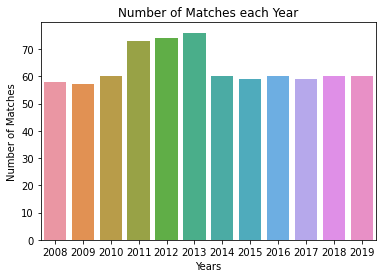

<Figure size 648x360 with 0 Axes>

In [46]:
seas = sns.countplot(data=match, x='season')
plt.title('Number of Matches each Year')
plt.xlabel('Years')
plt.ylabel('Number of Matches')
plt.figure(figsize=(9,5))
plt.show()

In [47]:
match['win_by']=np.where(match['win_by_runs']>0, 'Bat first', 'Bowl first')

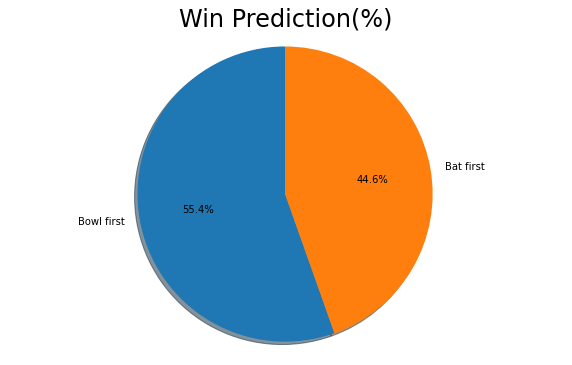

In [50]:
Win = match.win_by.value_counts()
labels = np.array(Win.index)
sizes = Win.values

plt.figure(figsize=(10,6))
plt.pie(sizes, labels= labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Win Prediction(%)', fontsize=24)
plt.axis('equal')
plt.show()

In [145]:
season_winner = match.drop_duplicates(subset=['season'], keep='first')[['season', 'winner']].reset_index(drop=True)
season_winner

,season,winner
0,2017,Sunrisers Hyderabad
1,2008,Kolkata Knight Riders
2,2009,Mumbai Indians
3,2010,Kolkata Knight Riders
4,2011,Chennai Super Kings
5,2012,Mumbai Indians
6,2013,Kolkata Knight Riders
7,2014,Kolkata Knight Riders
8,2015,Kolkata Knight Riders
9,2016,Rising Pune Supergiants


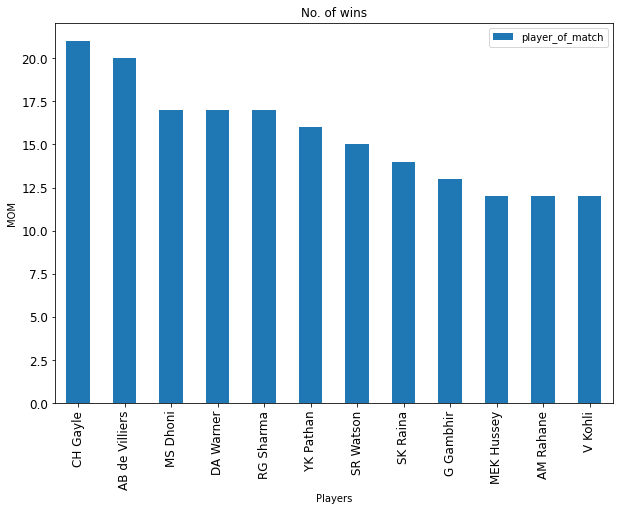

In [146]:
Man_of_the_Match = match.player_of_match.value_counts().head(12)
mom = Man_of_the_Match.plot(kind='bar', title="No. of wins", figsize=(10,7), legend=True, fontsize=12)
mom.set_xlabel('Players')
mom.set_ylabel('MOM')
plt.show()

In [87]:
match['player_of_match'].value_counts()[0:15]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
AM Rahane         12
V Kohli           12
DR Smith          11
V Sehwag          11
AD Russell        11
Name: player_of_match, dtype: int64

In [105]:
win = np.sum(match['toss_winner']==match['winner'])
win

393

In [106]:
toss = win/756*100
msg = f'Team who has won the Toss and Game: {toss}%'
print(msg)

Team who has won the Toss and Game: 51.98412698412699%


In [110]:
#no. of matches played in a city
match['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Indore              9
Dharamsala          9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Cuttack             7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [112]:
delivery.head(6)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [113]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [115]:
delivery.shape

(179078, 21)

In [118]:
team_stats = pd.DataFrame({'Matches played': match.team1.value_counts()
                           + match.team2.value_counts(), 'Total Won': match.winner.value_counts(),
                           'Total lost': 
                           ((match.team1.value_counts() + match.team2.value_counts()) - match.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace=True)
team_stats

,Teams,Matches played,Total Won,Total lost
0,Chennai Super Kings,164,100,64
1,Deccan Chargers,75,29,46
2,Delhi Capitals,16,10,6
3,Delhi Daredevils,161,67,94
4,Gujarat Lions,30,13,17
5,Kings XI Punjab,176,82,94
6,Kochi Tuskers Kerala,14,6,8
7,Kolkata Knight Riders,178,92,86
8,Mumbai Indians,187,109,78
9,Pune Warriors,46,12,34


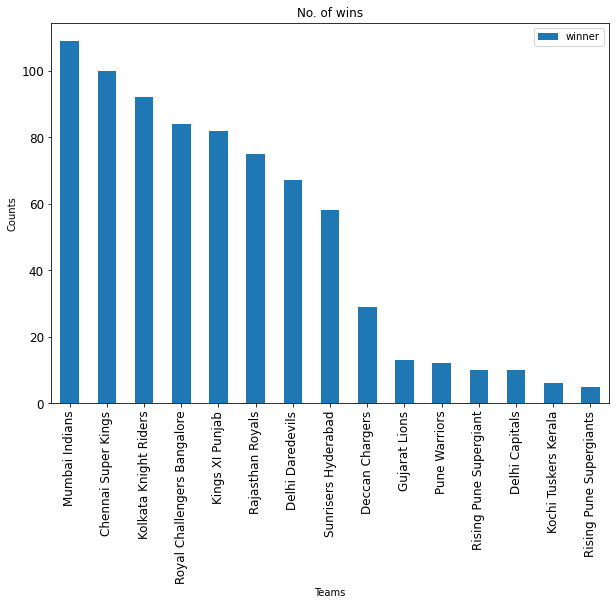

In [119]:
Total_won = match.winner.value_counts()
tw = Total_won.plot(kind='bar', title="No. of wins", figsize=(10,7), legend=True, fontsize=12)
tw.set_xlabel("Teams")
tw.set_ylabel("Counts")
plt.show()

In [128]:
batsman_sum = delivery.groupby("batsman").agg({'ball':'count', 'batsman_runs':'sum'})
batsman_sum.rename(columns={'ball':'balls', 'batsman_runs':'runs'}, inplace=True)
batsman_sum = batsman_sum.sort_values(['balls', 'runs'], ascending=False)
batsman_sum.head(n=12)

,balls,runs
batsman,,
V Kohli,4211,5434
SK Raina,4044,5415
RG Sharma,3816,4914
S Dhawan,3776,4632
G Gambhir,3524,4223
RV Uthappa,3492,4446
DA Warner,3398,4741
MS Dhoni,3318,4477
AM Rahane,3215,3850


In [129]:
wick_data = delivery.dropna(subset=['dismissal_kind'])
wick_data = wick_data[~wick_data['dismissal_kind'].isin(['run out', 'retired hurt', 'obstructing the field'])]

In [131]:
wick_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count', ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


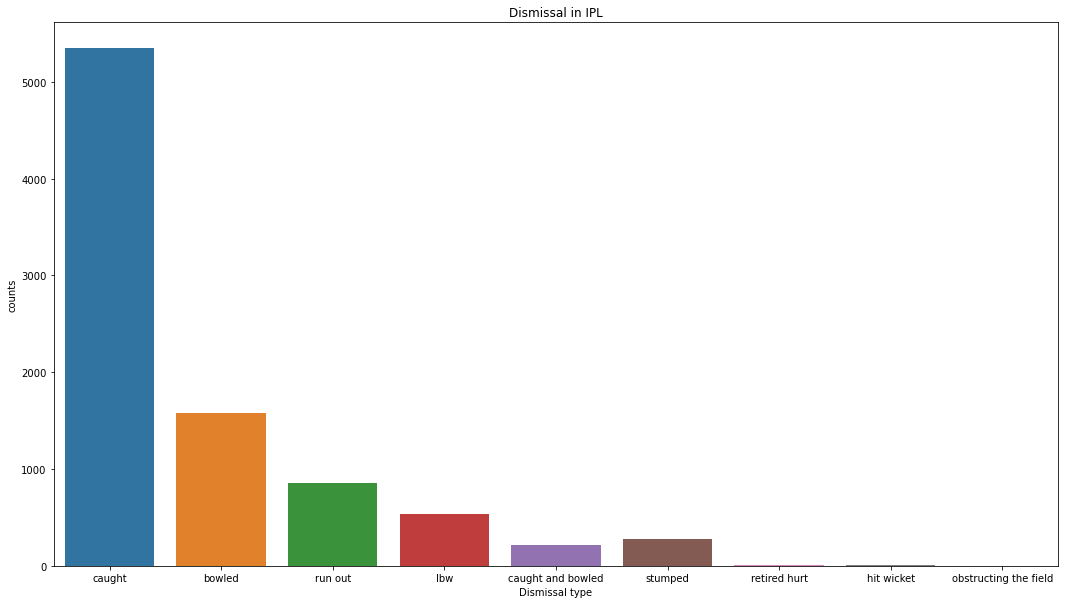

In [141]:
#dismissal types plot
plt.figure(figsize=(18,10))
ax = sns.countplot(delivery.dismissal_kind)
plt.title("Dismissal in IPL")
plt.xlabel("Dismissal type")
plt.ylabel("counts")
plt.show()

In [136]:
delivery['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

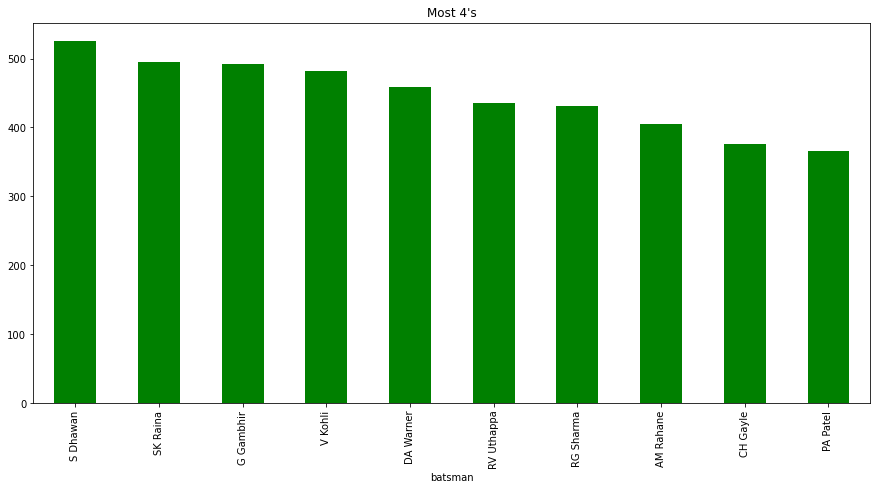

In [139]:
ply4 = delivery[delivery["batsman_runs"] == 4].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Most 4's", figsize=(15,7), color="green")
plt.show()

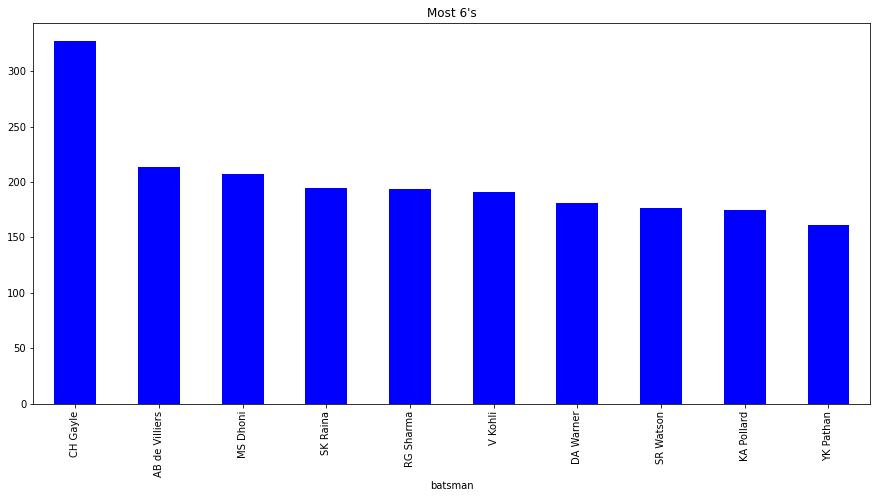

In [142]:
ply4 = delivery[delivery["batsman_runs"] == 6].groupby("batsman")["batsman_runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Most 6's", figsize=(15,7), color="blue")
plt.show()

In [144]:
season_winner["winner"].value_counts()

Kolkata Knight Riders      5
Chennai Super Kings        3
Mumbai Indians             2
Sunrisers Hyderabad        1
Rising Pune Supergiants    1
Name: winner, dtype: int64

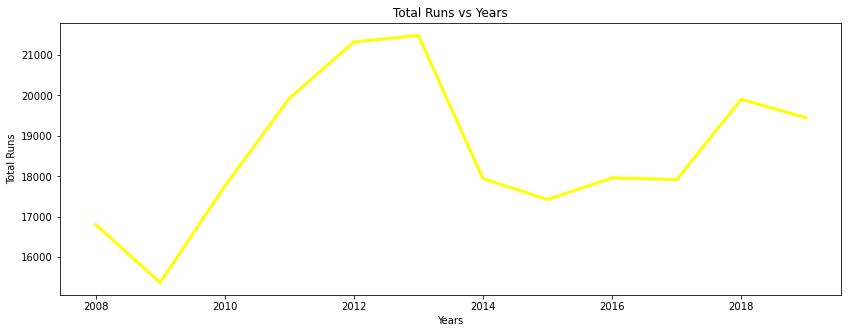

In [151]:
comb = pd.merge(delivery, match, left_on='match_id', right_on='id')
comb.groupby('season')['batsman_runs'].sum().plot(kind='line', linewidth=3, figsize=(14,5), color='yellow')
plt.title("Total Runs vs Years")
plt.xlabel("Years")
plt.ylabel("Total Runs")
plt.show()

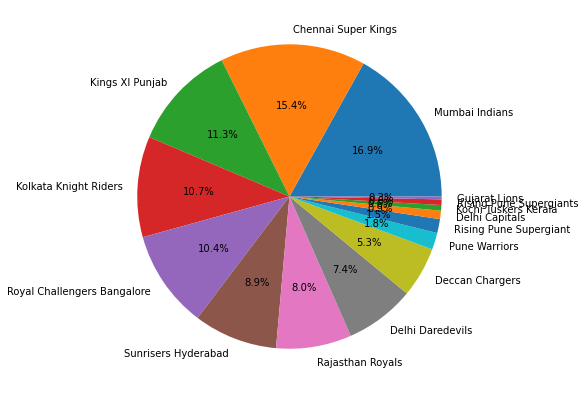

In [152]:
batting_first=match[match['win_by_runs']!=0]
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

## Thank You!